In [11]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import time_evolutor as te
import plotting as p

import sys
sys.path.append('/../../temp_prog/')
import tur_calculator as tc



In [12]:
#------------------SETUP-------------------
path_name = "meta1/all_values.npz"

T_L = 25 
T_R = 10
V_B = 30
eps = 50
delta_gamma = 0.04 #0.04
delta_epsilon = 0.04 #0.04

INPUT = {
    'eps': eps,
    'omega': 0, 
    'u': 250, 
    'V_B': V_B,
    'gamma': 1,  
    'T_L': T_L,
    'T_R': T_R,
    'delta_gamma': delta_gamma,
    'delta_epsilon': delta_epsilon,
}

initial = [1/4,1/4,1/4,1/4,0,0]         #beginns with both QDs empty
ti_array = np.linspace(0,1e5,10000)

In [13]:
importlib.reload(te)
sys, rho_ss, rho_t, I_ss, I, I_var, P, J_QH = te.calculate_paper_meta(initial, ti_array, **INPUT)
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)

#Save to file:
#np.savez(path_name, rho_ss=rho_ss, rho_t=rho_t, I_ss=I_ss, I=I, I_var=I_var, P=P, J_QH=J_QH, TUR=TUR, eff=eff, sigma=sigma)

[[ 1.  0.  0. -0.  0.  0.]
 [-0.  1.  0. -0. -0.  0.]
 [ 0.  0.  1.  0. -0. -0.]
 [-0. -0. -0.  1.  0.  0.]
 [ 0. -0.  0.  0.  1.  0.]
 [ 0.  0. -0. -0.  0.  1.]]
check l1 is identity: [-0.5 -0.5 -0.5 -0.5 -0.   0. ]
eigenvalues: [-5.20417043e-18+0.j -3.36566854e-03+0.j -1.90122584e+00+0.j
 -1.90156134e+00+0.j -3.99695115e+00+0.j -4.00000000e+00+0.j]

~~ Re(lambda3)/re(lambda2): ~~
-1.901561344268076/-0.003365668540427343=564.8880207471603
dim 6
I_ss:  0.03787769438531496
right lead?  -0.03787769438531495
J_QH:  [-185.50669717    1.28321094    1.32223169 ...    2.46209081    2.46209081
    2.46209081]


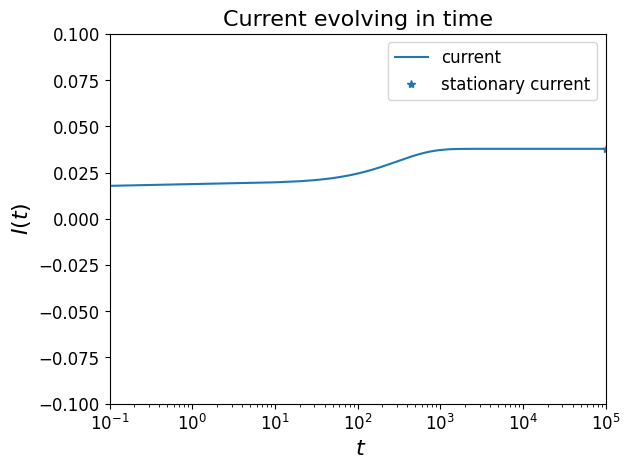

In [14]:
#plotting particle current
font_size = 16
plt.rcParams.update({'font.size': 12})  # Applies globally
plt.plot(ti_array,I, label = 'current')
plt.plot(ti_array[-1], I_ss, '*', color = 'C0', label='stationary current')

plt.legend()

plt.xlabel(r' $t$', fontsize = font_size)
plt.ylabel(r'$I(t)$', fontsize = font_size)
plt.xscale('log')
plt.xlim(1e-1,1e5)
plt.ylim(-0.1, 0.1)
plt.title('Current evolving in time', fontsize = font_size)

plt.show()


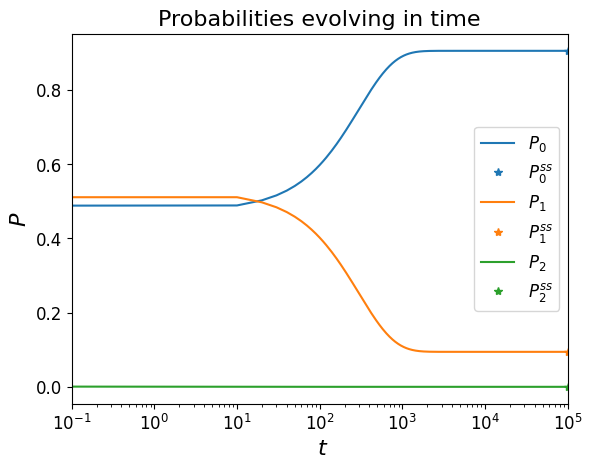

In [15]:
#plotting density matrix 
font_size = 16
plt.rcParams.update({'font.size': 12})  # Applies globally

rho_0 = rho_t[0]
rho_1 = rho_t[1]+rho_t[2]
rho_2 = rho_t[3]

rho_0_ss = rho_ss[0]
rho_1_ss = rho_ss[1]+rho_ss[2]
rho_2_ss = rho_ss[3]

plt.plot(ti_array,rho_0, label = r'$P_0$')
plt.plot(ti_array[-1], rho_0_ss, '*', color = 'C0', label=r'$P_0^{ss}$')
plt.plot(ti_array,rho_1, label = r'$P_1$')
plt.plot(ti_array[-1], rho_1_ss, '*', color = 'C1', label=r'$P_1^{ss}$')
plt.plot(ti_array,rho_2, label = r'$P_2$')
plt.plot(ti_array[-1], rho_2_ss, '*', color = 'C2', label=r'$P_2^{ss}$')

plt.legend()

plt.xlabel(r' $t$', fontsize = font_size)
plt.ylabel(r'$P$', fontsize = font_size)
plt.xscale('log')
plt.xlim(1e-1,1e5)
#plt.ylim(-0.1, 0.1)
plt.title('Probabilities evolving in time', fontsize = font_size)

plt.show()


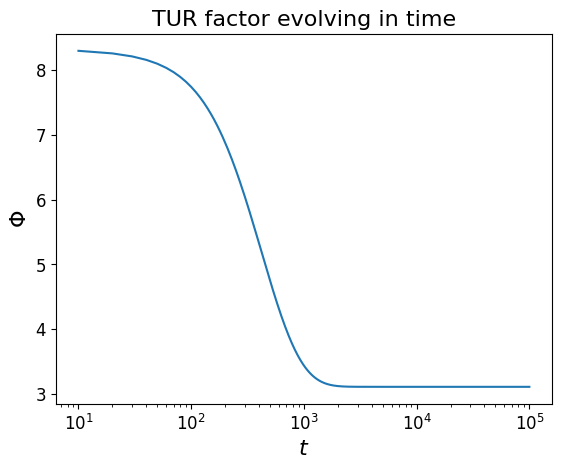

In [16]:
plt.rcParams.update({'font.size': 12})  # Applies globally
plt.plot(ti_array, TUR)
plt.title('TUR factor evolving in time', fontsize=font_size)
plt.xlabel(r'$t$', fontsize=font_size)
plt.ylabel(r'$\Phi$', fontsize=font_size)
plt.xscale('log')
#plt.set_ylim(3.1104, 3.111)

49.96 50.04


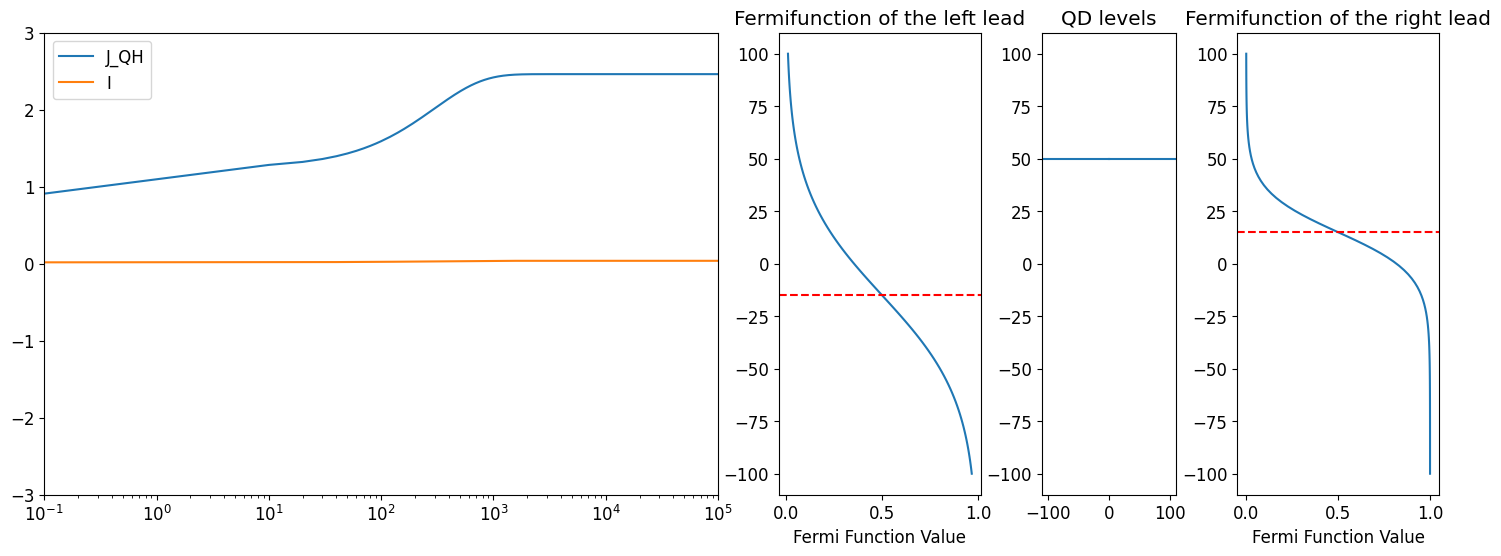

In [17]:
epsilons = np.linspace(-100,100,100)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6), gridspec_kw={'width_ratios': [10, 3, 2, 3]}) 

ax1.plot(ti_array, J_QH, label='J_QH')
ax1.plot(ti_array, I, label='I')
ax1.set_xscale('log')
ax1.set_xlim(1e-1,1e5)
ax1.set_ylim(-3, 3)

ax1.legend()

mu_L = -V_B/2       
mu_R = V_B/2 
eps1 = eps-delta_epsilon
eps2 =eps+delta_epsilon
print(eps1, eps2)

importlib.reload(p)
p.plot_fermi_function(epsilons, mu_L, T_L, ax2, "Fermifunction of the left lead")
p.plot_double_qd_leves(epsilons, eps1, eps2, ax3, 'QD levels')
p.plot_fermi_function(epsilons, mu_R, T_R, ax4, "Fermifunction of the right lead")

plt.show()

In [18]:
print('I', I)
print('P', P)
print('I_var', I_var)
print('heat current: ', J_QH)
print('sigma: ', sigma)
print('eff: ', eff)
print('TUR', TUR)

print('Min-TUR: ',np.nanmin(TUR))
print('TUR at: ', TUR[100])

I [-0.93086226  0.01974617  0.02034633 ...  0.03787769  0.03787769
  0.03787769]
P [-27.92586767   0.59238525   0.61038977 ...   1.13633083   1.13633083
   1.13633083]
I_var [-17.99588578   0.18214128   0.18676702 ...   0.13089904   0.13089904
   0.13089904]
heat current:  [-185.50669717    1.28321094    1.32223169 ...    2.46209081    2.46209081
    2.46209081]
sigma:  [       nan 0.01775413 0.01829492 ... 0.03409237 0.03409237 0.03409237]
eff:  [       nan 0.46164292 0.46163601 ... 0.46153084 0.46153084 0.46153084]
TUR [       nan 8.29357657 8.25389313 ... 3.11047363 3.11047363 3.11047363]
Min-TUR:  3.1104736286520627
TUR at:  3.4388724213910864


Text(0.5, 1.0, 'Current')

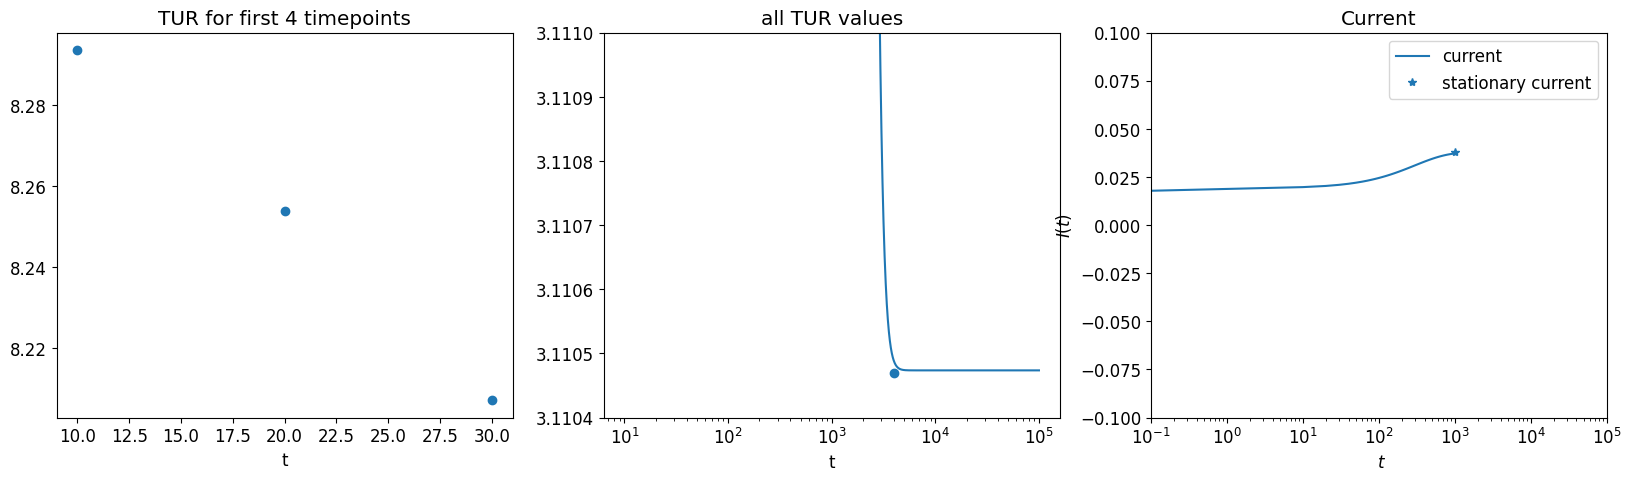

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].scatter(ti_array[0:4], TUR[0:4])
axes[0].set_title('TUR for first 4 timepoints')
axes[0].set_xlabel('t')

axes[1].plot(ti_array, TUR)
axes[1].set_title('all TUR values')
axes[1].set_xlabel('t')
axes[1].set_xscale('log')
axes[1].set_ylim(3.1104, 3.111)
axes[1].scatter(4000, 3.11047)


axes[2].plot(ti_array[0:100],I[0:100], label = 'current')
axes[2].plot(ti_array[100], I_ss, '*', color = 'C0', label='stationary current')
axes[2].set_xscale('log')
axes[2].set_xlim(1e-1,1e5)
axes[2].set_ylim(-0.1, 0.1)

axes[2].legend()

axes[2].set_xlabel(r' $t$')
axes[2].set_ylabel(r'$I(t)$')
axes[2].set_title('Current')


In [20]:
print(np.min(TUR))
print(TUR[0])

nan
nan
